<a href="https://colab.research.google.com/github/statistics-jun/2022-1-ESAA/blob/main/ESAA_Week10_Recommendation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022-1 ESAA 5기 김혜준 개념 필사 - 0513(금) 10주차 과제
 
## <파이썬 머신러닝 완벽 가이드>
## Chapter 9 추천시스템

### 01 추천 시스템의 개요와 배경
#### 추천 시스템의 개요
* 전자상거래 업체, 콘텐츠 포털은 추천 시스템을 이용해 사용자의 취향을 이해하고 맞춤 상품과 콘텐츠 제공
* 추천 엔진의 고도화에 큰 비용과 투자 -> 더욱더 많은 수익 창출 노력
* 사용자 자신도 좋아하는지 몰랐던 취향을 시스템이 발견하고 그에 맞는 콘텐츠 추천

    -> 사용자의 신뢰 향상 -> 더 많은 추천 콘텐츠 선택 -> 더 많은 데이터 축적 -> 추천이 더 정확해지고 다양해짐

    => 좋은 선순환 시스템 구축

#### 온라인 스토어의 필수 요소, 추천 시스템
* 추천 시스템으로 사용자의 선택 부담을 해결 : 좋은 추천 시스템은 사용자가 무엇을 뭔하는지 빠르게 찾아내 사용자의 온라인 쇼핑 즐거움 배가

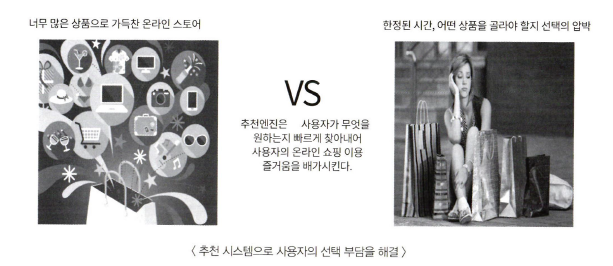

* 데이터 기반의 추천 시스템 : 온라인 스토어는 많은 양의 고객과 상품 관련 데이터를 사용하여 사용자가 흥미를 가질 만한 상품을 즉각적으로 추천

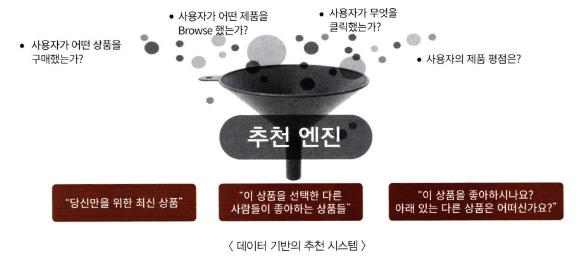

#### 추천 시스템의 유형
* 추천 시스템의 유형
  - 콘텐츠 기반 필터링(Content based filtering)
  - 협업 필터링(Collaborative Filtering)
    - 최근접 이웃(Nearest Neighbor) 협업 필터링
    - 잠재 요인(Latent Factor) 협업 필터링
* 추천 시스템의 사용 동향
  - 초창기 : 콘텐츠 기반 필터링, 최근접 이웃 기반 협업 필터링 주로 사용
  - 현재
    - 대부분의 온라인 스토어에서 행렬 분해 기법을 이용한 잠재 요인 협업 필터링 기반 추천 시스템 적용
    - 서비스하는 아이템 특성에 따라 콘텐츠 기반 필터링, 최근접 이웃 기반 협업 필터링 유지하는 사이트도 많음

      예) 아마존 : 아이템 기반 최근접 이웃 협업 필터링 사용
    - 개인화 특성을 좀 더 강화하기 위해 하이브리드 형식으로 콘텐츠 기반과 협업 기반을 적절히 결합해 사용하는 경우도 증가

### 02 콘텐츠 기반 필터링 추천 시스템
* 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천해주는 방식

  예) 사용자가 특정 영화에 높은 평점
  
    -> 그 영화의 장르, 출연 배우, 감독, 영화 키워드 등의 콘텐츠와 유사한 다른 영화를 추천


### 03 최근접 이웃 협업 필터링
* 협업 필터링 : 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천 수행
  - 주요 목표 : 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가(Predicted Rating)

   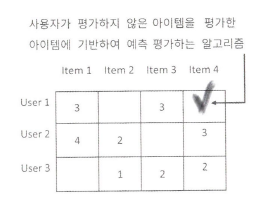
  - 최근접 이웃 방식, 잠재 요인 방식 모두 사용자-아이템 평점 행렬 데이터에만 의지해 추천 수행
  >사용자-아이템 평점 행렬 : 행은 개별 사용자, 열은 개별 아이템, 값은 평점
    - 판다스 `pivot_table()` 함수 이용해 레코드 레벨 형태인 사용자-아이템 평점 데이터(그림의 왼쪽)를 사용자-아이템 평점 행렬 형태(그림의 오른쪽)로 변경해야 함
  >
  >  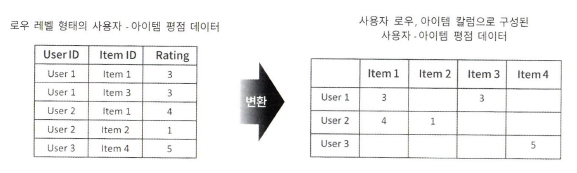
    - 다차원 행렬(많은 아이템을 열로 갖기 때문)
    - 희소 행렬 특성(사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때문)

* 최근접 이웃 협업 필터링(메모리(Memory) 협업 필터링)
  - 사용자 기반(User-User) : 특정 사용자와 타 사용자 간의 유사도(Similarity)를 측정한 뒤 가장 유사도가 높은 TOP-N 사용자를 추출해 그들이 선호하는 아이템을 추천하는 방식 
  
    > *당신과 비슷한 고객들이 다음 상품도 구매했습니다(Customers like you also bought these items).*

    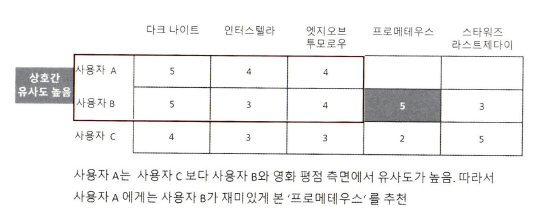

  - 아이템 기반(Item-Item) : 아이템이 가지는 속성과는 상관없이 사용자들이 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘
      
    > *이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다(Customers who bought this item also bought these items).*

    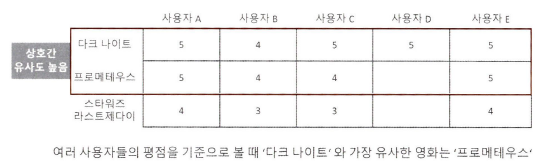

      - 사용자 기반 최근접 이웃 데이터 세트와 행과 열이 서로 반대(행이 개별 아이템, 열이 개별 사용자)
    
  - 일반적으로 사용자 기반보다는 아이템 기반 협업 필터링의 정확도가 더 높음

      => 최근접 이웃 협업 필터링은 대부분 아이템 기반의 알고리즘 적용
    

* 추천 시스템의 유사도 측정 : 주로 코사인 유사도를 가장 많이 적용(다차원 희소 행렬이기 때문)

### 04 잠재 요인 협업 필터링
#### 잠재 요인 협업 필터링의 이해
* 잠재 요인 협업 필터링 : 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법
  - 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해(행렬 분해(Matrix Factorization))하는 과정에서 잠재 요인 추출
  - 알고리즘 개요
    
    1. 잠재 요인 기반으로 다차원 희소 행렬인 사용자-아이템 행렬 데이터를 저차원 밀집 행렬의 사용자-잠재 요인 행렬과 아이템-잠재 요인의 전치 행렬(잠재 요인-아이템 행렬)로 분해

    2. 분해된 두 행렬의 내적을 통해 새로운 예측 사용자-아이템 평점 행렬 데이터 만듦
    3. 사용자가 아직 평점을 부여하지 않은 아이템에 대한 예측 평점 생성

    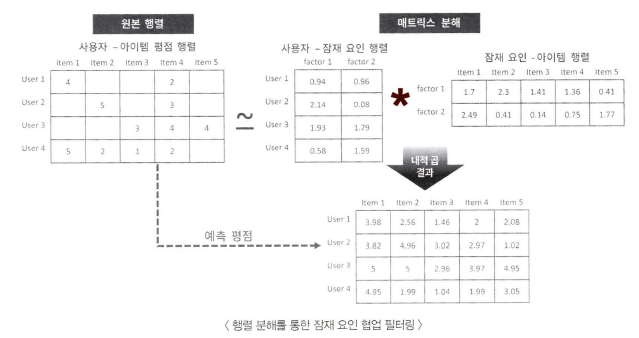

#### 행렬 분해의 이해
* 행렬 분해 : 다차원의 매트릭스를 저차원의 매트릭스로 분해하는 기법
* 사용자-아이템 평점 행렬의 분해
  - R = P * Q.T
    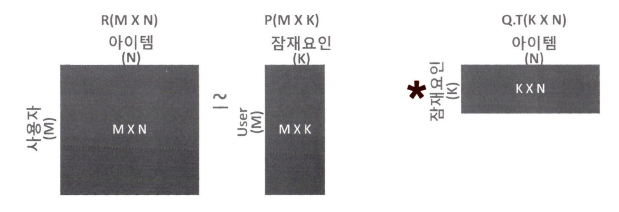
      - R : M x N 차원의 사용자-아이템 평점 행렬(고차원 희소 행렬)
      - P : M x K 차원의 사용자-잠재 요인 행렬(저차원 밀집 행렬)
        - 개별 Row는 개별 User에 대한 잠재 요인들을 반영
      - Q : N x K 차원의 아이템-잠재 요인 행렬 (저차원 밀집 행렬)
      - Q.T : Q의 전치 행렬; K x N 차원의 잠재 요인-아이템 행렬
        - 개별 Column은 개별 Item에 대한 잠재 요인들을 반영
    
  - $r_{(u, i)} = p_u * q^{t}_i$
    - $r_{(u, i)}$ : R 행렬의 u행 사용자와 i열 아이템 위치에 있는 평점 데이터
    - $p_u$ : P 행렬에서 u행 사용자의 벡터
    - $q^{t}_i$ : Q 행렬의 i행 아이템 벡터의 전치 벡터

* 대표적인 행렬 분해 방법
  - SVD(Singular Vector Decomposition) : 주로 사용하는 방법
    - 널(NaN) 값이 없는 행렬에만 적용 가능
      
      -> 널 값이 많은 R 행렬을 P와 Q 행렬로 분해할 경우 일반적인 방식 대신 확률적 경사 하강법(Stochastic Gradient Descent, SGD)이나 ALS(Alternating Least Squares) 방식 이용
  - NMF(Non-Negative Matrix Factorization)


#### 확률적 경사 하강법을 이용한 행렬 분해
* P와 Q 행렬로 계산된 예측 R 행렬의 값이 실제 R 행렬의 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추
* 절차
  1. P와 Q를 임의의 값을 가진 행렬로 설정
  2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값 계산
  3. 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트
  4. 만족할 만한 오류 값을 가질 때까지 2, 3번 작업을 반족하면서 P와 Q 값을 업데이트해 근사화
* 사용자-아이템 평점 행렬 분해 : 예측 오류값의 최소화와 학습 시 과적합 방지 위해 L2 규제 반영
  - 새롭게 업데이트되는 $p^{'}_u$, $q^{'}_i$ 계산 식
  
    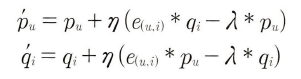

    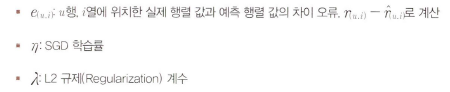

In [1]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
              [np.NaN, 5, np.NaN, 3, 1 ],
              [np.NaN, np.NaN, 3, 4, 4 ],
              [5, 2, 1, 2, np.NaN ]])
num_users, num_items = R.shape
K=3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력합니다.
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [2]:
from sklearn.metrics import mean_squared_error

# 실제 R 행렬과 예측 행렬의 오차를 구하는 함수 get_rmse 정의
def get_rmse(R, P, Q, non_zeros):
  error = 0
  # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P, Q.T)

  # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

In [3]:
# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [ (i,j,R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j] > 0 ]

steps=1000 # SGD를 반복해서 업데이트할 횟수
learning_rate=0.01 # SGD의 학습률
r_lambda=0.01 # L2 regularization 계수

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
  for i, j, r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 구함
    eij = r - np.dot(P[i, :], Q[j, :].T)
    # Regularizaton을 반영한 SGD 업데이트 공식 적용
    P[i, :] = P[i, :] + learning_rate*(eij * Q[j, :] - r_lambda*P[i, :])
    Q[j, :] = Q[j, :] + learning_rate*(eij * P[i, :] - r_lambda*Q[j, :])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0: # get_rmse 함수를 통해 50회 반복할 때마다 오류 값 출력
      print("### iteration step : ", step, " rmse : ", rmse)

### iteration step :  0  rmse :  3.261355059488935
### iteration step :  0  rmse :  3.26040057174686
### iteration step :  0  rmse :  3.253984404542389
### iteration step :  0  rmse :  3.2521583839863624
### iteration step :  0  rmse :  3.252335303789125
### iteration step :  0  rmse :  3.251072196430487
### iteration step :  0  rmse :  3.2492449982564864
### iteration step :  0  rmse :  3.247416477570409
### iteration step :  0  rmse :  3.241926055455223
### iteration step :  0  rmse :  3.2400454107613084
### iteration step :  0  rmse :  3.240166740749792
### iteration step :  0  rmse :  3.2388050277987723
### iteration step :  50  rmse :  0.5003190892212748
### iteration step :  50  rmse :  0.5001616291326989
### iteration step :  50  rmse :  0.49899601202578087
### iteration step :  50  rmse :  0.4988483450145831
### iteration step :  50  rmse :  0.49895189256631756
### iteration step :  50  rmse :  0.49833236830090993
### iteration step :  50  rmse :  0.4984148489378701
### iterati

In [4]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]


* 원본 행렬과 비교해 널이 아닌 값은 큰 차이가 나지 않고, 널인 값은 새로운 예측값으로 채워짐